**This dataset (https://www.kaggle.com/datasets/ayushcx/nike-global-sales-data-2024) contains detailed monthly sales information, including:**

Regions: Greater China, Japan, South Korea, India, Southeast Asia,
America, Europe.

Categories: Footwear, Apparel, and Equipment, with various sub-categories and product lines.

Metrics: Units sold, revenue (USD), retail prices, and online sales percentages.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
nike_sales_data = pd.read_csv('/content/nike_sales_2024.csv')

##Структура даних
* Перевірити загальну структуру та зміст датасету.
* Визначити типи змінних (текстові/числові) та їх призначення.

In [ ]:
nike_sales_data.head()

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160


In [ ]:
nike_sales_data.shape

(1000, 10)

In [ ]:
nike_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    1000 non-null   object
 1   Region                   1000 non-null   object
 2   Main_Category            1000 non-null   object
 3   Sub_Category             1000 non-null   object
 4   Product_Line             1000 non-null   object
 5   Price_Tier               1000 non-null   object
 6   Units_Sold               1000 non-null   int64 
 7   Revenue_USD              1000 non-null   int64 
 8   Online_Sales_Percentage  1000 non-null   int64 
 9   Retail_Price             1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


**Структура:**

*   *Month:* Місяць продажів.
*   *Region:* Регіон продажів.
*  *Main_Category:* Основна категорія продукту (наприклад, Apparel, Footwear, Equipment).
*   *Sub_Category:* Підкатегорія продукту.
*   *Product_Line:* Лінійка продуктів.
*   *Price_Tier:* Цінова категорія (Budget, Mid-Range, Premium).
*   *Units_Sold:* Кількість проданих одиниць.
*   *Revenue_USD:* Дохід у доларах США.
*   *Online_Sales_Percentage:* Відсоток продажів онлайн.
*   *Retail_Price:* Роздрібна ціна.

## Перевірка якості даних
* Виявити пропущені значення.
* Перевірити наявність дублікатів.

In [ ]:
# Перевірка пропущених значень
nike_sales_data.isnull().sum()

,0
Month,0
Region,0
Main_Category,0
Sub_Category,0
Product_Line,0
Price_Tier,0
Units_Sold,0
Revenue_USD,0
Online_Sales_Percentage,0
Retail_Price,0


In [ ]:
# Перевірка дублікатів
nike_sales_data.duplicated().sum()

0

## Розподіл кількісних змінних

In [ ]:
nike_sales_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Units_Sold,1000.0,28498.951,1.292650e+04,5028.0,17554.25,28685.0,40026.0,49992.0
Revenue_USD,1000.0,5039576.410,3.267217e+06,287400.0,2344675.00,4328020.0,7264942.5,14864700.0
Online_Sales_Percentage,1000.0,70.040,1.174864e+01,50.0,60.00,71.0,80.0,90.0
Retail_Price,1000.0,176.320,7.526169e+01,50.0,110.00,180.0,240.0,300.0


**Описова статистика:**

* *Units_Sold:* Середня кількість проданих одиниць становить 28,499, з мінімумом 5,028 і максимумом 49,992.
* *Revenue_USD:* Середній дохід $$5,039,576, з мінімумом $287,400 і максимумом $14,864,700.
* *Online_Sales_Percentage:* Онлайн-продажі варіюються від 50% до 90%.
* *Retail_Price:* Роздрібна ціна варіюється від $50 до $300, з середньою ціною $176.32.

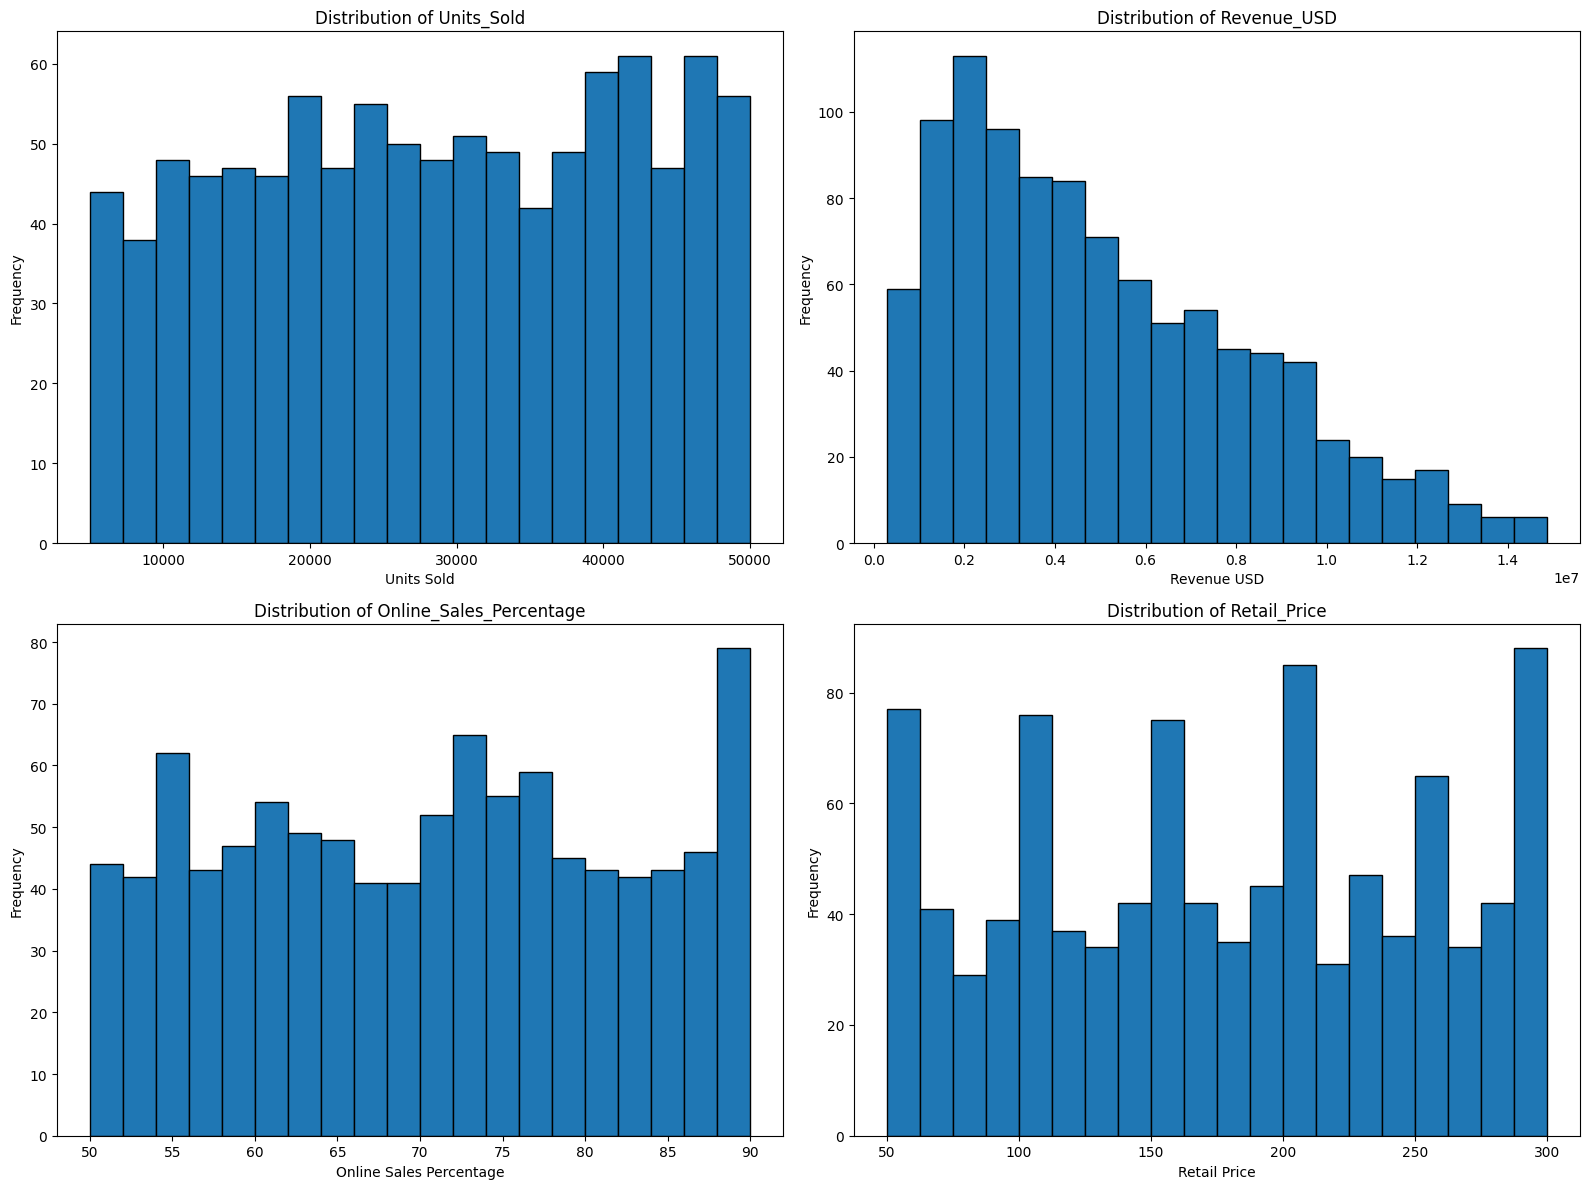

In [ ]:
numerical_columns = ['Units_Sold', 'Revenue_USD', 'Online_Sales_Percentage', 'Retail_Price']

num_columns = 2
num_rows = int(len(numerical_columns) / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, num_rows * 6))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    axes[i].hist(nike_sales_data[column], bins=20, edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column.replace('_', ' '))
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**1. Units_Sold (Продані одиниці):**
* Продажі виглядають досить збалансованими, без значного відхилення або перекосів до менших чи більших значень.
* Найвища частота продажів спостерігається у діапазоні між 40,000 та 50,000 одиниць товару.

**2. Revenue_USD (Дохід у доларах США):**
* Гістограма демонструє правосторонній асиметричний розподіл, що свідчить про те, що більшість доходів зосереджено в нижньому діапазоні (у межах $$ 2–8 мільйонів), тоді як менше спостережень у вищих діапазонах доходів.
* У розподілі є довгий хвіст, що вказує на наявність меншої кількості високодохідних випадків (понад $10 млн).

**3. Online_Sales_Percentage (Відсоток онлайн-продажів):**
* Розподіл не має чітко вираженої симетрії чи рівномірності. Це свідчить про те, що онлайн-продажі змінювалися залежно від певних факторів (наприклад, категорії товарів, сезонності тощо).
* Найбільша частота спостерігається в діапазоні 90%, що може свідчити про значний сегмент товарів чи періодів, де майже всі продажі здійснюються онлайн.

**4. Retail_Price (Роздрібна ціна):**
* Найвища частота спостерігається на крайньому діапазоні цін: близько 300 одиниць. Інші помітні піки можна спостерігати близько 100, 150, 200 та 250 одиниць.
* Розподіл роздрібних цін демонструє тенденцію до того, що ціни концентруються навколо певних точок, ймовірно через цінову стратегію, акційні пропозиції чи переваги покупців.

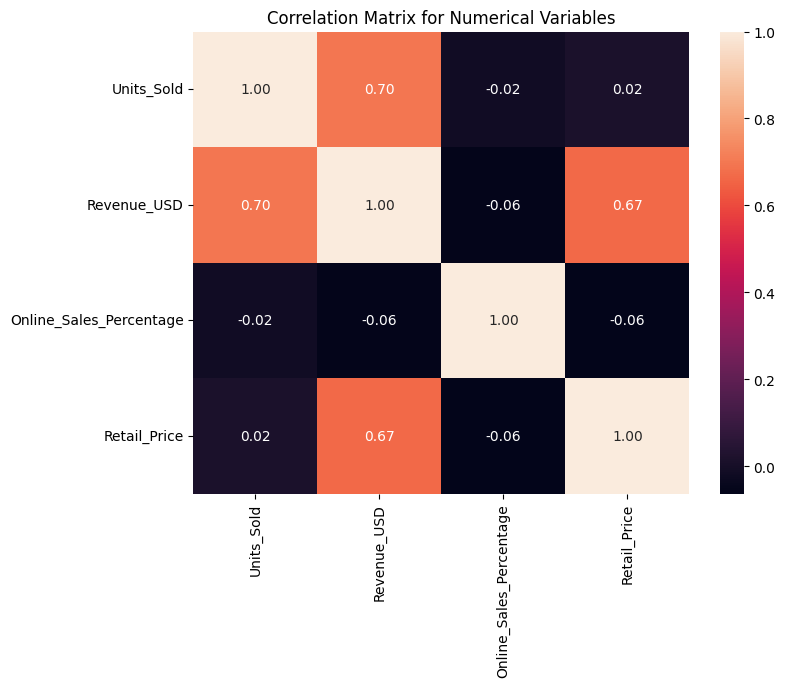

In [ ]:
correlation_matrix = nike_sales_data.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

**Ключові висновки:**

* Units_Sold сильно впливає на Revenue_USD. Units_Sold і Revenue_USD мають сильну позитивну кореляцію (0.70). Збільшення кількості проданих одиниць напряму впливає на зростання доходу. Це очікувано для бізнесу, де загальний дохід значною мірою залежить від обсягів продажів.
* Retail_Price також позитивно корелює з Revenue_USD (0.67), свідчачи про те, що дохід значно зростає зі збільшенням роздрібної ціни. Це очікувано, оскільки продукти з вищою ціною генерують більший дохід, навіть якщо обсяги продажів залишаються однаковими.

* Відсутність кореляції з Online_Sales_Percentage: Частка онлайн-продажів не демонструє помітної залежності від обсягів продажів, ціни чи доходу.

## Розподіл категоріальних змінних

In [ ]:
nike_sales_data.describe(include='object').T

,count,unique,top,freq
Month,1000,12,December,96
Region,1000,7,Greater China,161
Main_Category,1000,3,Equipment,352
Sub_Category,1000,11,Outerwear,125
Product_Line,1000,24,Windrunner,65
Price_Tier,1000,3,Budget,348


In [ ]:
categorical_columns = ['Month', 'Region', 'Main_Category', 'Sub_Category', 'Product_Line', 'Price_Tier']

for col in categorical_columns:
    print(f"Column: {col}")
    print(nike_sales_data[col].value_counts())
    print("\n")


Column: Month
Month
December     96
February     96
September    91
June         91
July         90
October      85
May          85
January      78
August       75
March        73
November     72
April        68
Name: count, dtype: int64


Column: Region
Region
Greater China     161
America           147
South Korea       146
India             145
Japan             144
Europe            133
Southeast Asia    124
Name: count, dtype: int64


Column: Main_Category
Main_Category
Equipment    352
Apparel      343
Footwear     305
Name: count, dtype: int64


Column: Sub_Category
Sub_Category
Outerwear      125
Accessories    123
Bags           116
Socks          113
Tops           109
Performance    109
Lifestyle       66
Football        63
Cricket         61
Basketball      58
Running         57
Name: count, dtype: int64


Column: Product_Line
Product_Line
Windrunner           65
Bags                 62
Vapor Cricket        61
Hats                 61
Rain Jacket          60
Backpack        

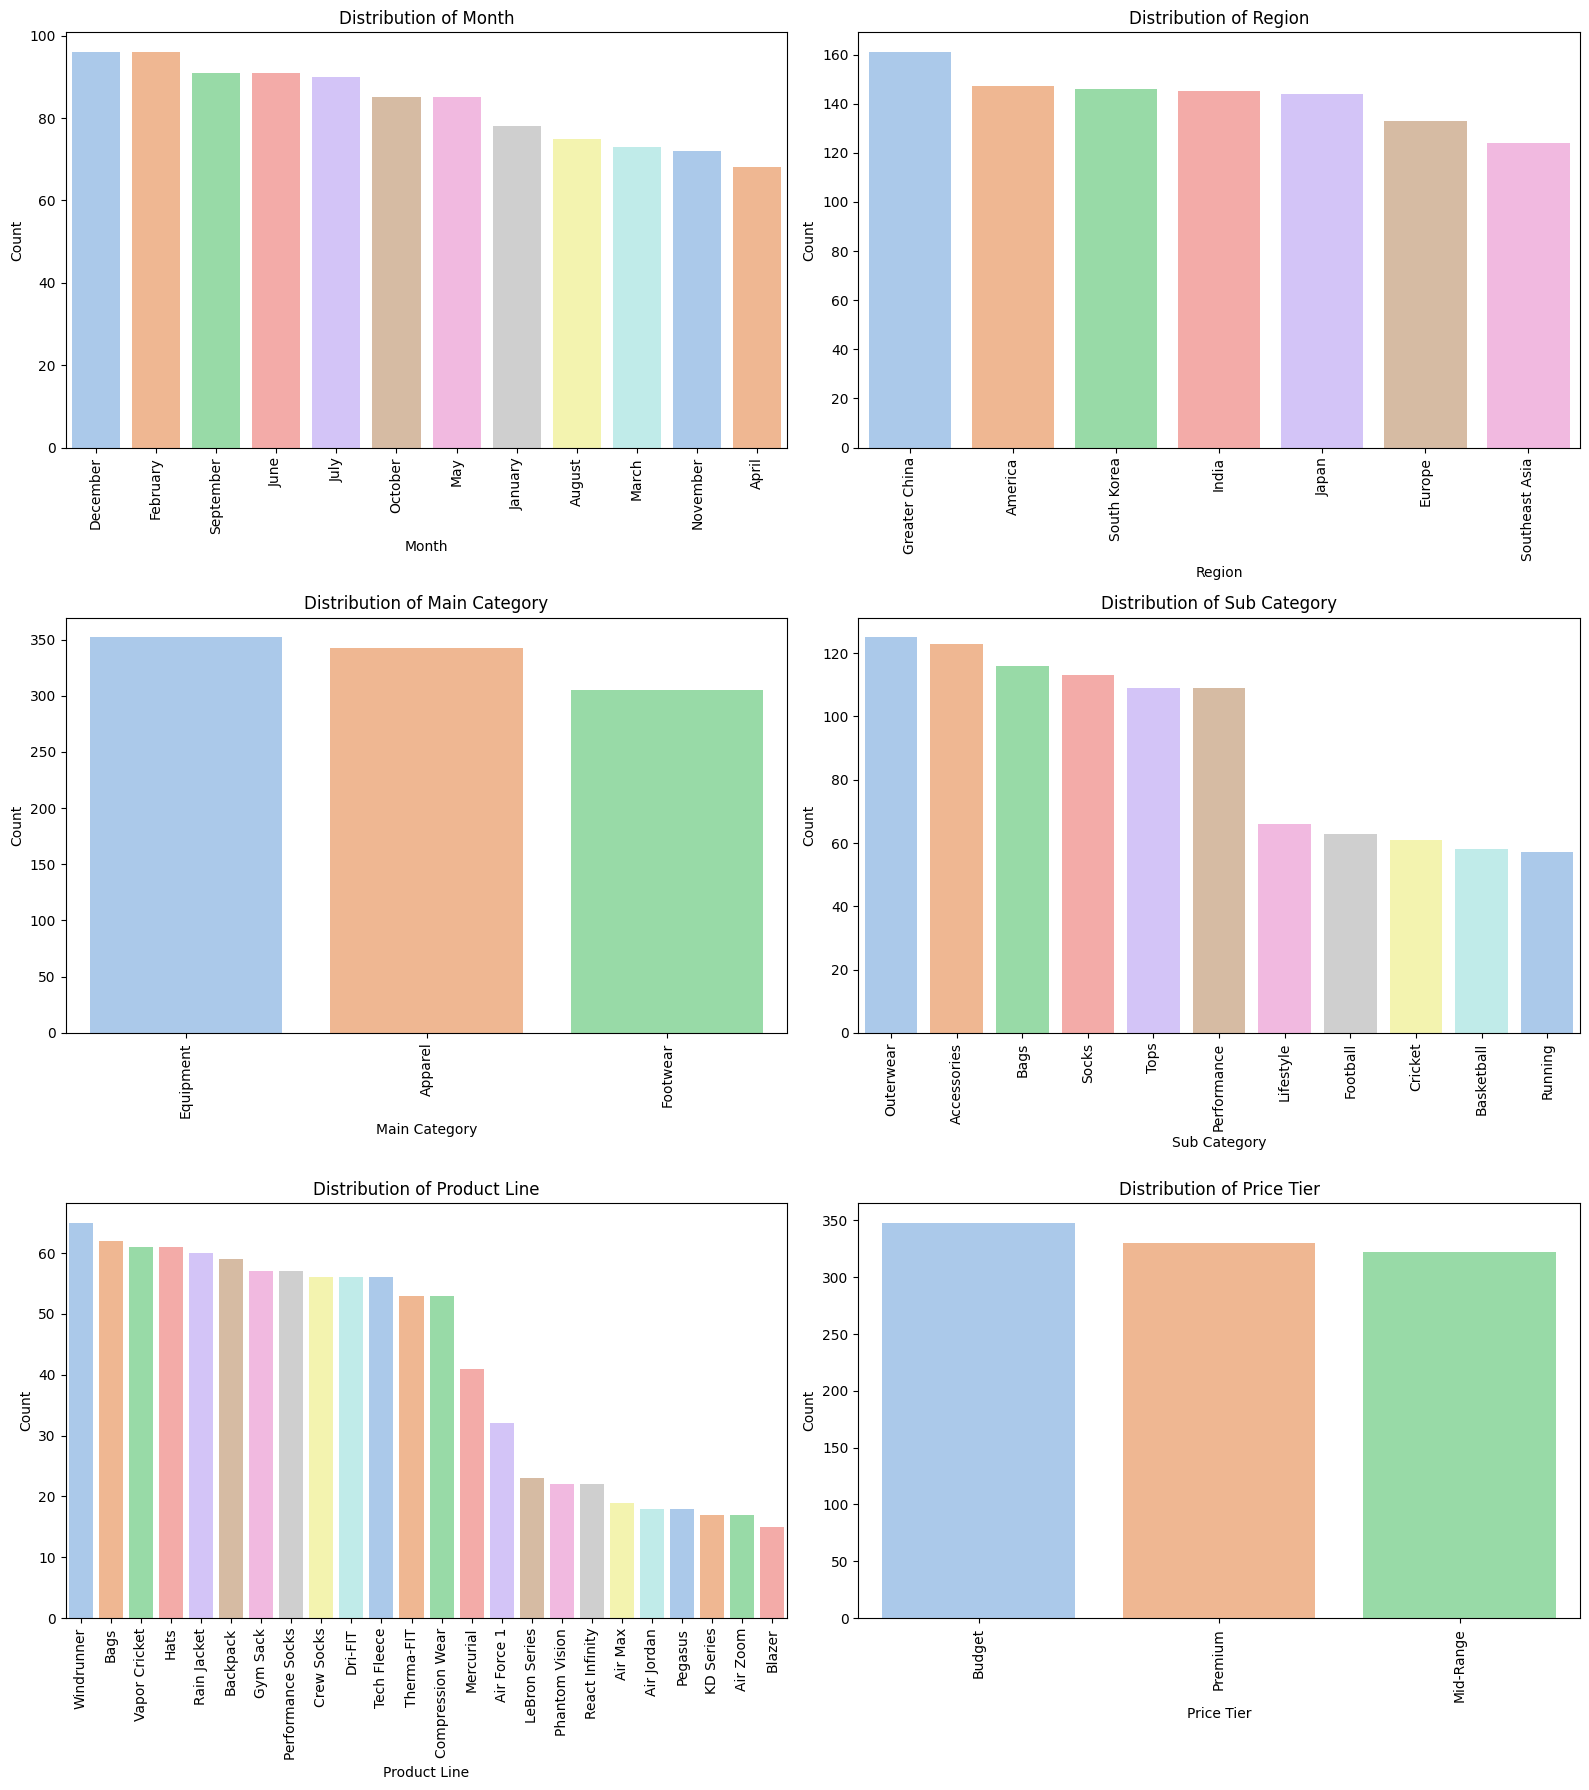

In [ ]:
categorical_columns = ['Month', 'Region', 'Main_Category', 'Sub_Category', 'Product_Line', 'Price_Tier']

num_columns = 2
num_rows = int(len(categorical_columns) / num_columns)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, num_rows * 6))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(data=nike_sales_data, x=column, order=nike_sales_data[column].value_counts().index, palette="pastel", ax=axes[i])
    axes[i].set_title(f'Distribution of {column.replace("_", " ")}')
    axes[i].set_xlabel(column.replace('_', ' '))
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

**1. Month (Місяці):**
* Найбільше записів припадає на грудень, що свідчить про високу активність продажів у передсвятковий період.
* Місяці з меншою кількістю записів, такі як квітень, вказують на сезонне зниження попиту.

**2. Region (Регіони):**
* Найбільше записів мають регіони Greater China та Americas, що свідчить про їх важливість для бізнесу Nike.
* Інші регіони, такі як Southeast Asia та Europe, мають меншу кількість записів, що може вказувати на менший обсяг продажів або обмежені ринки.

**3. Main_Category (Основні категорії):**
* Найпопулярнішою категорією є Equipment, що може свідчити про високий попит на спорядження.
* Категорії демонструють збалансованість продажів між ключовими продуктами.

**4. Sub_Category (Підкатегорії):**
* Категорії Outerwear, Accessories та Bags мають найбільшу частоту, що вказує на їх популярність серед споживачів.
* Категорії Running і Basketball мають значно меншу кількість записів, що може свідчити про специфічний попит або обмежену аудиторію.

**5. Product_Line (Лінійки продуктів):**
* Найпопулярнішими є Windrunner, Bags та Vapor Cricket, що вказує на їх домінування в асортименті Nike.
* Лінійки, такі як Air Zoom та Blazer, мають меншу частоту, можливо, через менший попит або специфічну аудиторію.

**6. Price_Tier (Цінові категорії):**
* Категорії Budget, Premium, та Mid-Range мають майже рівну частоту, що вказує на ефективну цінову стратегію.
* Рівномірний розподіл демонструє широкий фокус на різні сегменти ринку.

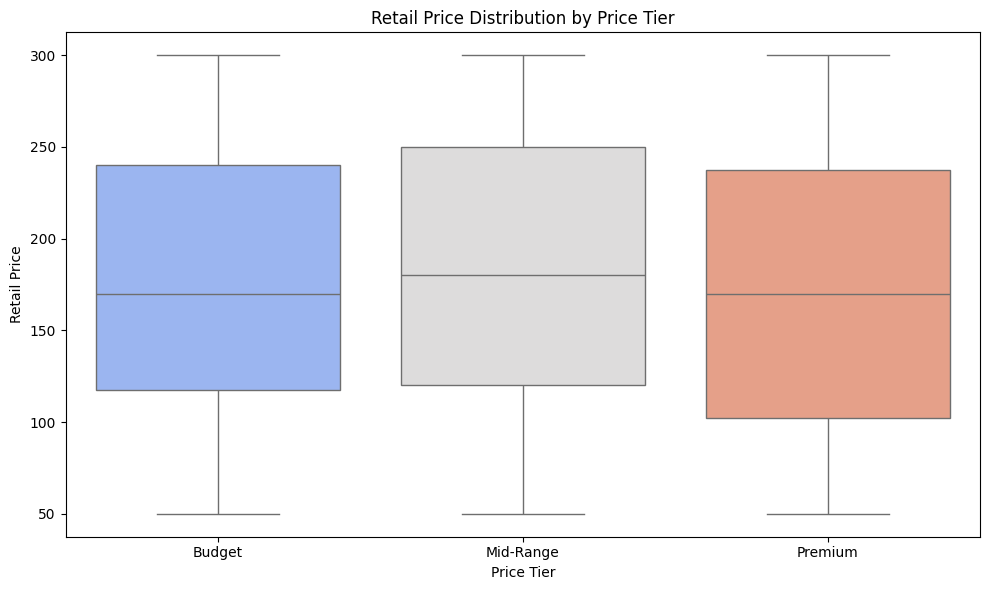

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price_Tier', y='Retail_Price', data=nike_sales_data, order=['Budget', 'Mid-Range', 'Premium'], palette='coolwarm')
plt.title("Retail Price Distribution by Price Tier")
plt.xlabel("Price Tier")
plt.ylabel("Retail Price")
plt.tight_layout()
plt.show()


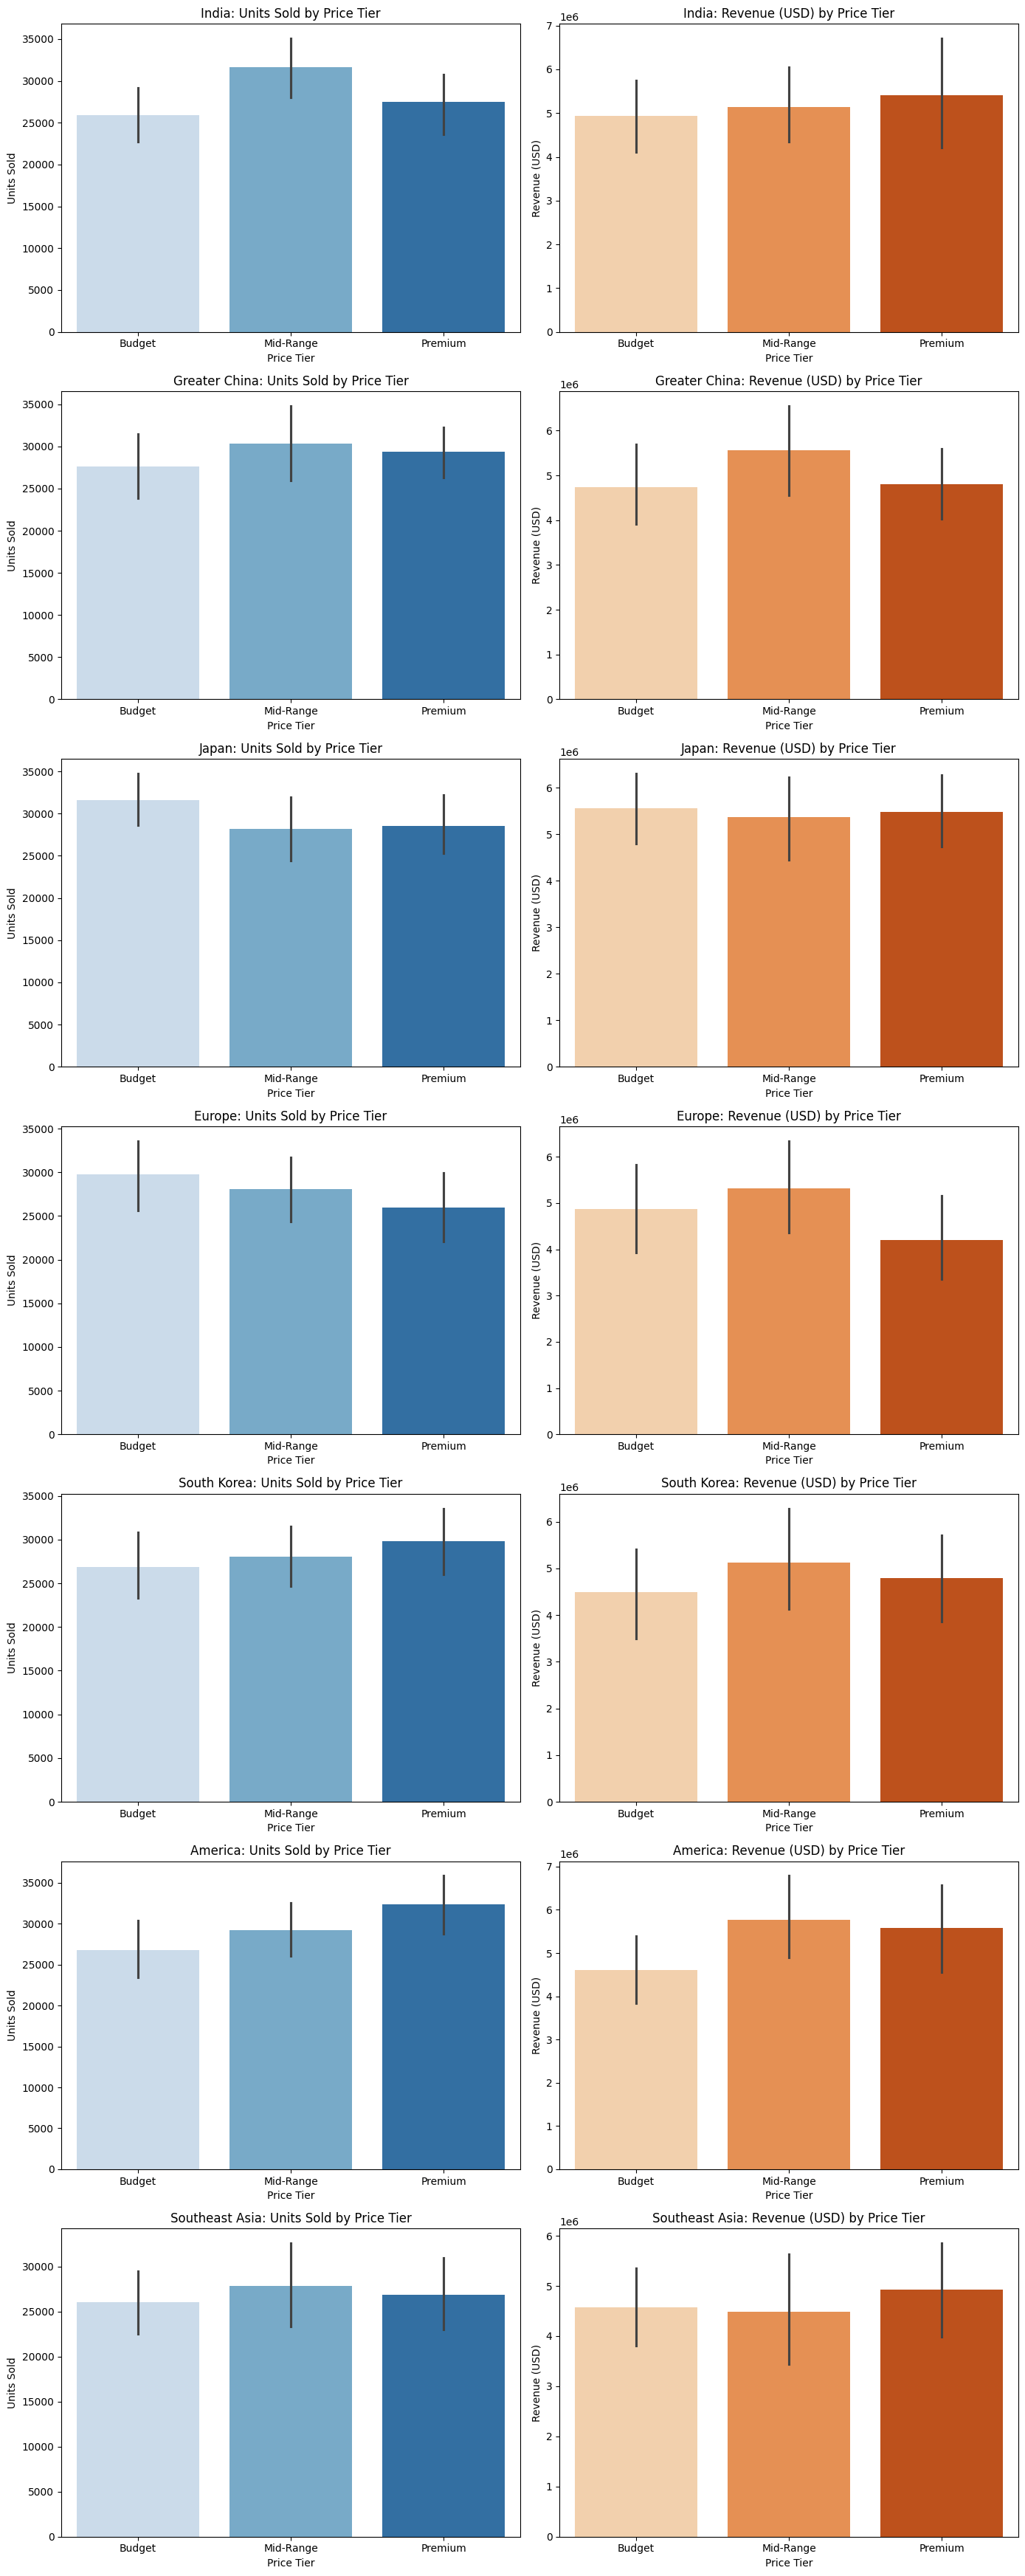

In [ ]:
regions = nike_sales_data['Region'].unique()
order = ['Budget', 'Mid-Range', 'Premium']

fig, axes = plt.subplots(nrows=len(regions), ncols=2, figsize=(14, len(regions) * 5))

for i, region in enumerate(regions):
    region_data = nike_sales_data[nike_sales_data['Region'] == region]

    # Units Sold and Price Tier
    sns.barplot(
        ax=axes[i, 0],
        x='Price_Tier',
        y='Units_Sold',
        data=region_data,
        order=order,
        palette='Blues'
    )
    axes[i, 0].set_title(f"{region}: Units Sold by Price Tier")
    axes[i, 0].set_xlabel("Price Tier")
    axes[i, 0].set_ylabel("Units Sold")

    # Revenue (USD) and Price Tier
    sns.barplot(
        ax=axes[i, 1],
        x='Price_Tier',
        y='Revenue_USD',
        data=region_data,
        order=order,
        palette='Oranges'
    )
    axes[i, 1].set_title(f"{region}: Revenue (USD) by Price Tier")
    axes[i, 1].set_xlabel("Price Tier")
    axes[i, 1].set_ylabel("Revenue (USD)")

plt.tight_layout()
plt.show()

In [ ]:
avg_price_per_category = nike_sales_data.groupby(['Price_Tier', 'Sub_Category'])['Retail_Price'].mean()
sorted_avg_price_per_category = avg_price_per_category.groupby(level=0, group_keys=False).apply(
    lambda x: x.sort_values(ascending=False)
)
print(sorted_avg_price_per_category)

Price_Tier  Sub_Category
Budget      Socks           198.965517
            Lifestyle       186.785714
            Accessories     186.250000
            Bags            182.765957
            Outerwear       171.891892
            Tops            171.025641
            Performance     167.142857
            Running         167.000000
            Cricket         165.500000
            Football        162.400000
            Basketball      158.571429
Mid-Range   Cricket         233.500000
            Outerwear       195.217391
            Football        193.600000
            Bags            191.538462
            Socks           188.709677
            Accessories     170.000000
            Tops            167.619048
            Performance     165.000000
            Lifestyle       161.764706
            Running         158.000000
            Basketball      146.250000
Premium     Cricket         199.523810
            Outerwear       188.809524
            Football        187.692308


In [ ]:
sales_distribution = nike_sales_data.groupby(['Price_Tier', 'Sub_Category'])['Units_Sold'].sum()

sorted_sales_distribution = sales_distribution.groupby(level=0, group_keys=False).apply(
    lambda x: x.sort_values(ascending=False)
)
print(sorted_sales_distribution)

Price_Tier  Sub_Category
Budget      Bags            1335513
            Performance     1170372
            Tops            1091496
            Outerwear       1067639
            Accessories     1059058
            Lifestyle        777047
            Socks            763367
            Football         670984
            Basketball       611772
            Cricket          599768
            Running          504652
Mid-Range   Tops            1332796
            Outerwear       1292410
            Bags            1089498
            Accessories     1014927
            Performance      985202
            Socks            862416
            Football         689964
            Cricket          646533
            Basketball       513869
            Running          490511
            Lifestyle        454442
Premium     Accessories     1564404
            Outerwear       1378068
            Socks           1373110
            Bags             929556
            Performance      853903
   

## Графіки

### Total Revenue by Month

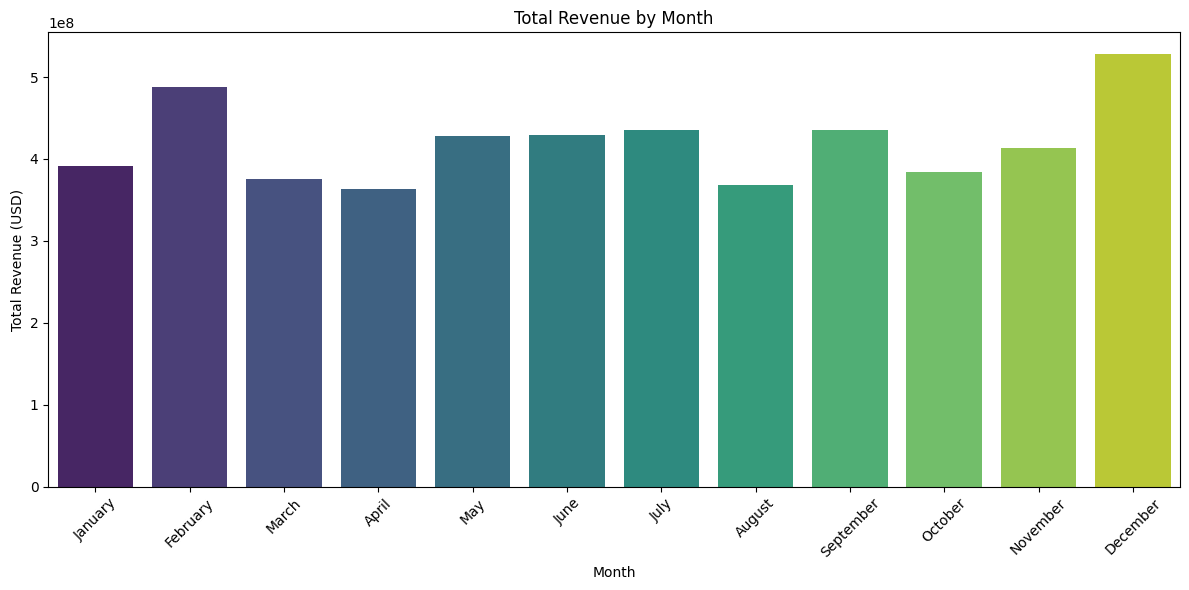

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Revenue_USD', data=nike_sales_data, estimator=sum, ci=None, order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.title("Total Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

* Грудень демонструє найвищий дохід, що пояснюється новорічними та різдвяними святами, підвищеним попитом на одяг, взуття та аксесуари.
* Лютий також має високий рівень доходу, можливо, через післясвяткові розпродажі, нові випуски продуктів або підготовку до весняного сезону.
* Березень, квітень і серпень демонструють спад у продажах, що може бути пов’язано з відсутністю значних святкових чи спортивних подій у цей період. Nike може розглянути можливість запуску маркетингових кампаній у ці місяці для стимулювання продажів.

### Units Sold by Month

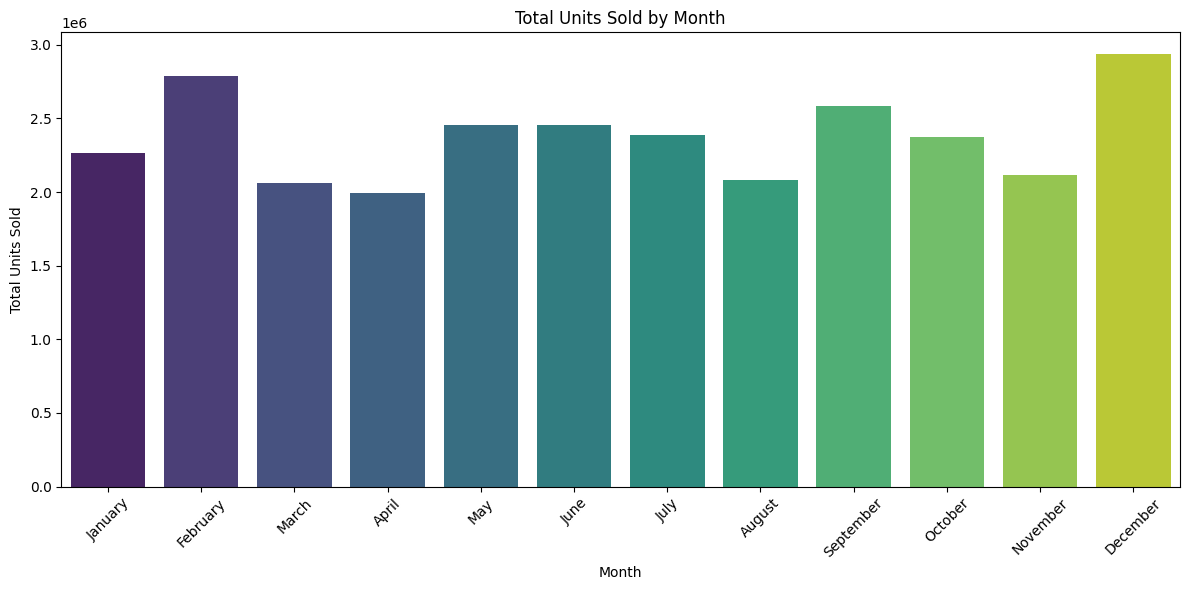

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Units_Sold', data=nike_sales_data, estimator=sum, ci=None, order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.title("Total Units Sold by Month")
plt.xlabel("Month")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

* Грудень – найбільший обсяг продажу, що відповідає високому доходу на попередньому графіку. Святковий сезон стимулює не тільки дорогі покупки, а й масові покупки доступних товарів.
* Лютий – високі продажі, що також узгоджується з високим доходом. Це може вказувати на активні розпродажі або зимові колекції, що продаються у великих кількостях.
* Квітень і серпень мають низькі продажі, що узгоджується з їх низьким доходом. Це може свідчити про перехідні періоди між сезонами, коли споживачі відкладають покупки.

### Total Revenue by Region (Stacked by Main Category)

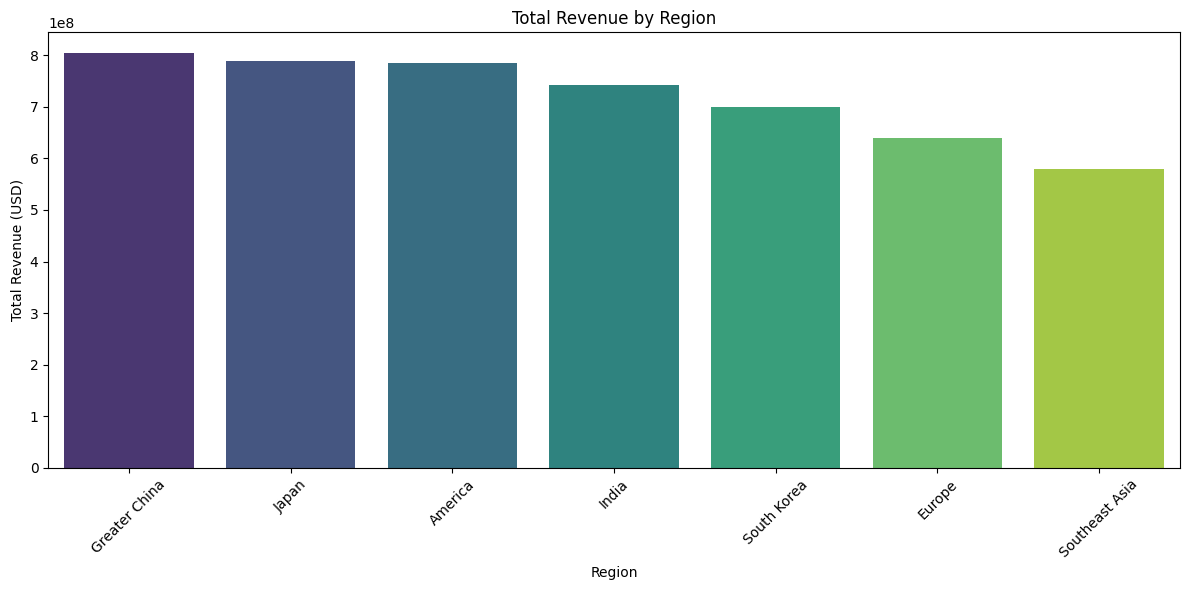

In [ ]:
region_total_revenue = nike_sales_data.groupby('Region')['Revenue_USD'].sum().reset_index()

region_total_revenue = region_total_revenue.sort_values(by='Revenue_USD', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Revenue_USD', data=region_total_revenue, palette='viridis')

plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

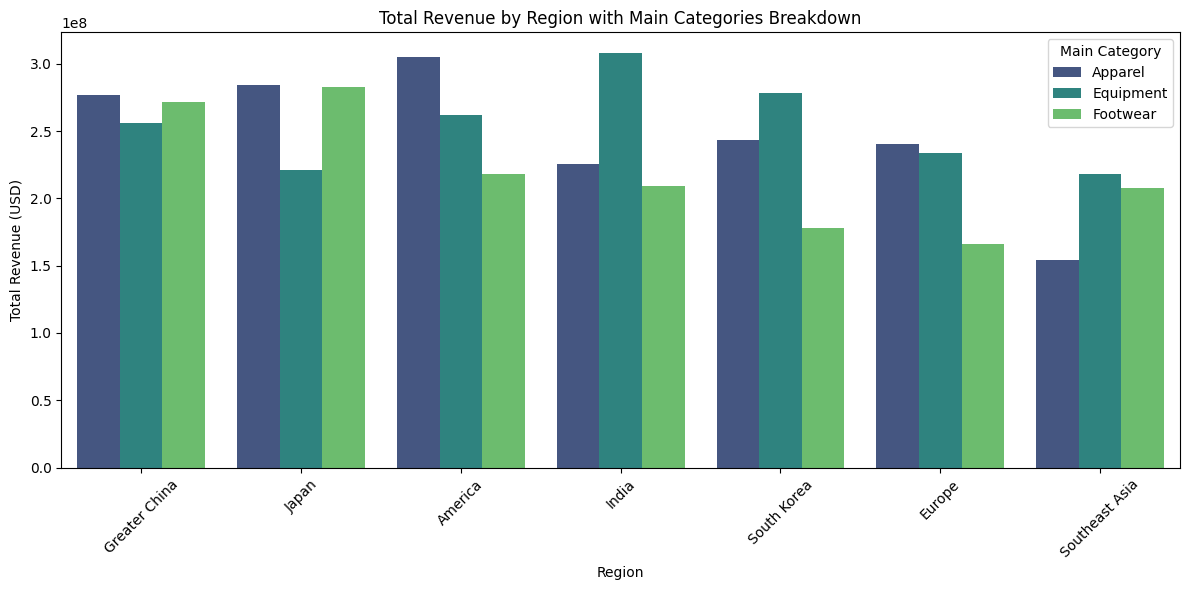

In [ ]:
region_revenue = nike_sales_data.groupby(['Region', 'Main_Category'])['Revenue_USD'].sum().reset_index()

region_order = region_revenue.groupby('Region')['Revenue_USD'].sum().sort_values(ascending=False).index

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Revenue_USD', hue='Main_Category', data=region_revenue, order=region_order, palette='viridis')

plt.title("Total Revenue by Region with Main Categories Breakdown")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.legend(title="Main Category")
plt.tight_layout()

plt.show()

* Great China, Japan, America – найбільші регіони за доходом.
* Southeast Asia має найнижчий дохід серед усіх регіонів.
* Apparel (одяг) – найбільший внесок у дохід у більшості регіонів.
Це ключова категорія в America, Greater China, Japan, Europe.
В India Equipment генерує більше доходу, ніж Apparel.
* Equipment (спортивне спорядження) – займає суттєву частку ринку, особливо в India та South Korea. Високий дохід може свідчити про великий попит на спортивні аксесуари.
* Footwear (взуття) – у всіх регіонах приносить стабільний, але не домінуючий дохід.Найменше представлене в India та Europe.

### Total Units Sold by Region (Stacked by Main Category)

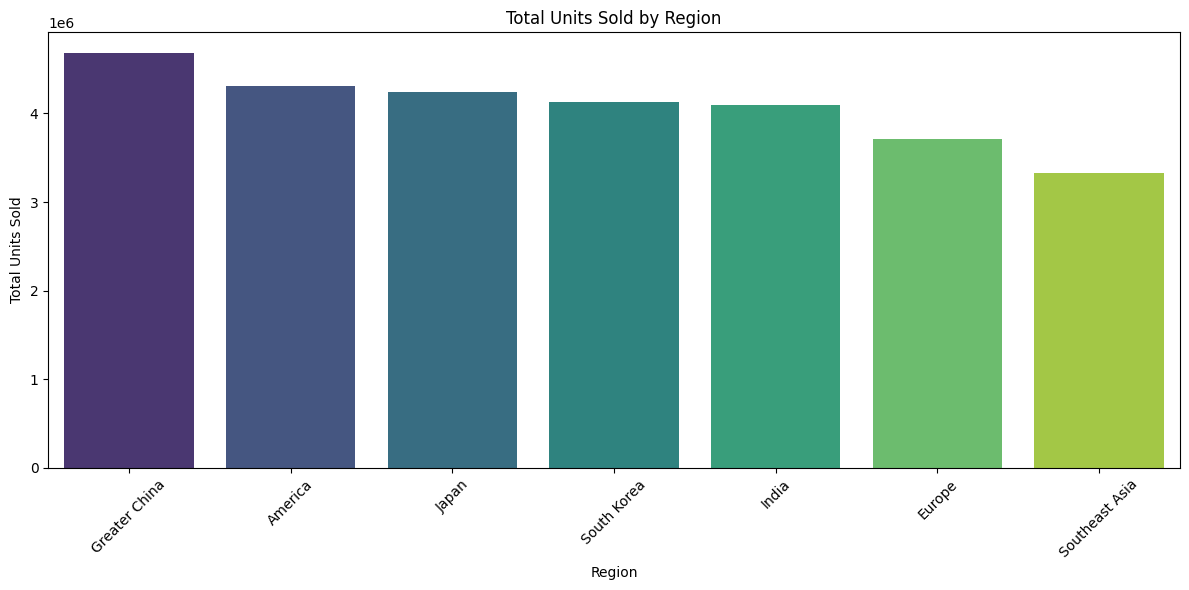

In [ ]:
region_total_units = nike_sales_data.groupby('Region')['Units_Sold'].sum().reset_index()

region_total_units = region_total_units.sort_values(by='Units_Sold', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Units_Sold', data=region_total_units, palette='viridis')

plt.title("Total Units Sold by Region")
plt.xlabel("Region")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

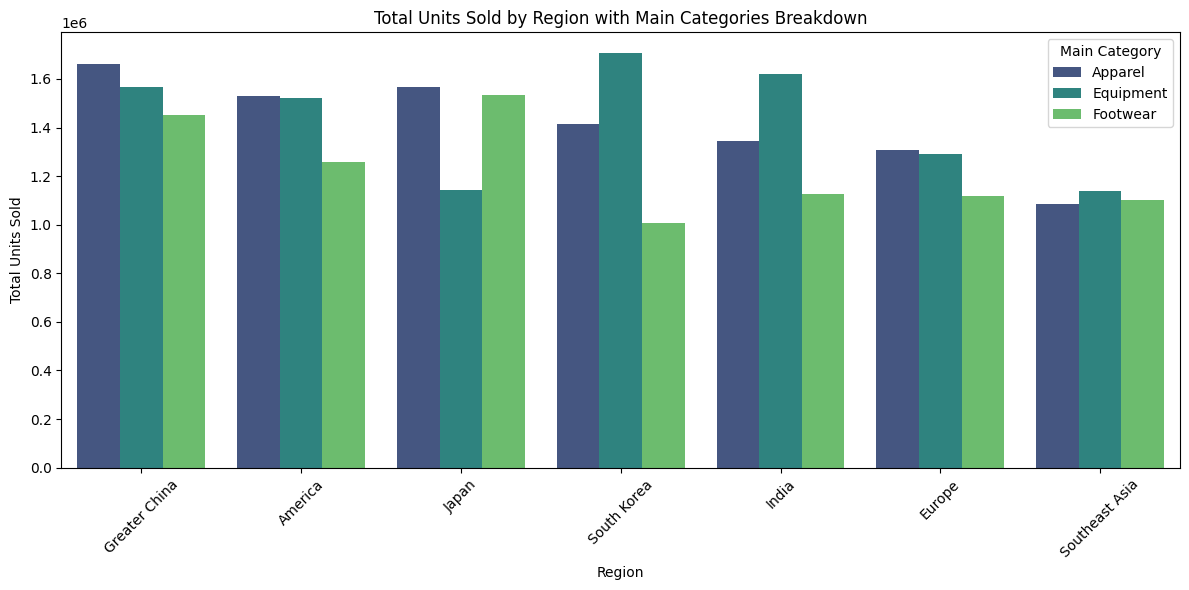

In [ ]:
region_units = nike_sales_data.groupby(['Region', 'Main_Category'])['Units_Sold'].sum().reset_index()

region_order = region_units.groupby('Region')['Units_Sold'].sum().sort_values(ascending=False).index

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Units_Sold', hue='Main_Category', data=region_units, order=region_order, palette='viridis')

plt.title("Total Units Sold by Region with Main Categories Breakdown")
plt.xlabel("Region")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=45)
plt.legend(title="Main Category")
plt.tight_layout()

plt.show()

* Greater China – регіон із найбільшою кількістю проданих одиниць, що узгоджується з його високим доходом.
* America та Japan – також мають високі продажі, що корелює з їх доходами.
* Southeast Asia – регіон із найменшою кількістю проданих одиниць, що співпадає з його відносно низьким доходом.
* Europe має відносно низькі продажі порівняно з іншими великими регіонами, що може пояснювати його нижчу позицію в рейтингу доходу.

**Вплив категорій на кількість продажів**
* Apparel (одяг) – домінує в більшості регіонів, особливо в Greater China, America та Japan, що узгоджується з його лідерством у доходах.
* Equipment (спортивне спорядження) – має дуже високий вплив у South Korea та India, що пояснює їх рівень продажів.
* Footwear (взуття) – стабільно представлений у всіх регіонах, але не є домінуючою категорією за обсягами продажів.

### Revenue/Units Sold by Main Category

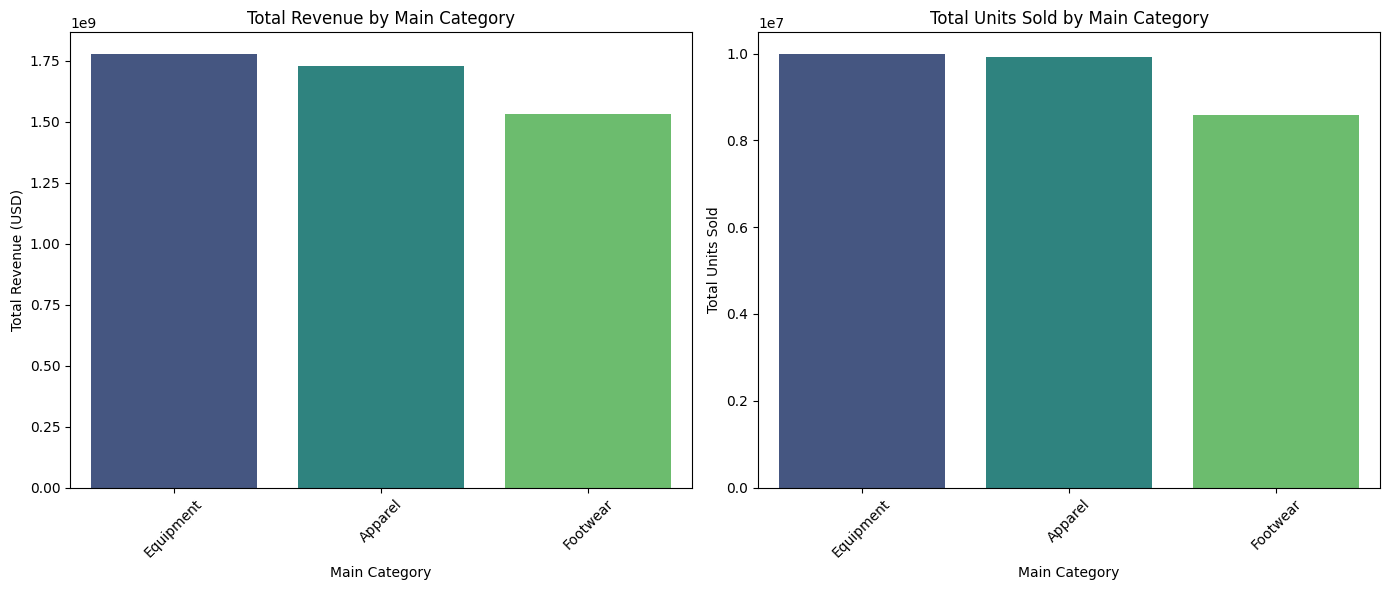

In [ ]:
category_revenue = nike_sales_data.groupby('Main_Category')['Revenue_USD'].sum().reset_index().sort_values(by='Revenue_USD', ascending=False)
category_units_sold = nike_sales_data.groupby('Main_Category')['Units_Sold'].sum().reset_index().sort_values(by='Units_Sold', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Main_Category', y='Revenue_USD', data=category_revenue, palette='viridis', ax=axes[0])
axes[0].set_title("Total Revenue by Main Category")
axes[0].set_xlabel("Main Category")
axes[0].set_ylabel("Total Revenue (USD)")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.barplot(x='Main_Category', y='Units_Sold', data=category_units_sold, palette='viridis', ax=axes[1])
axes[1].set_title("Total Units Sold by Main Category")
axes[1].set_xlabel("Main Category")
axes[1].set_ylabel("Total Units Sold")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


**Доходи (Revenue by Main Category)**
* Equipment приносить найбільше доходу.
* Apparel (одяг) – майже такий самий дохід, що вказує на стабільний попит.
* Footwear (взуття) – має найнижчий дохід серед категорій, можливо, через менші продажі або нижчу середню ціну.

**Кількість проданих одиниць (Units Sold by Main Category)**

* Equipment та Apparel мають найвищу майже однакову кількість продажів, що відповідає їхньому високому доходу.
* Footwear продається в менших обсягах, що пояснює його нижчий дохід.

### Revenue/Units Sold by Sub-Category

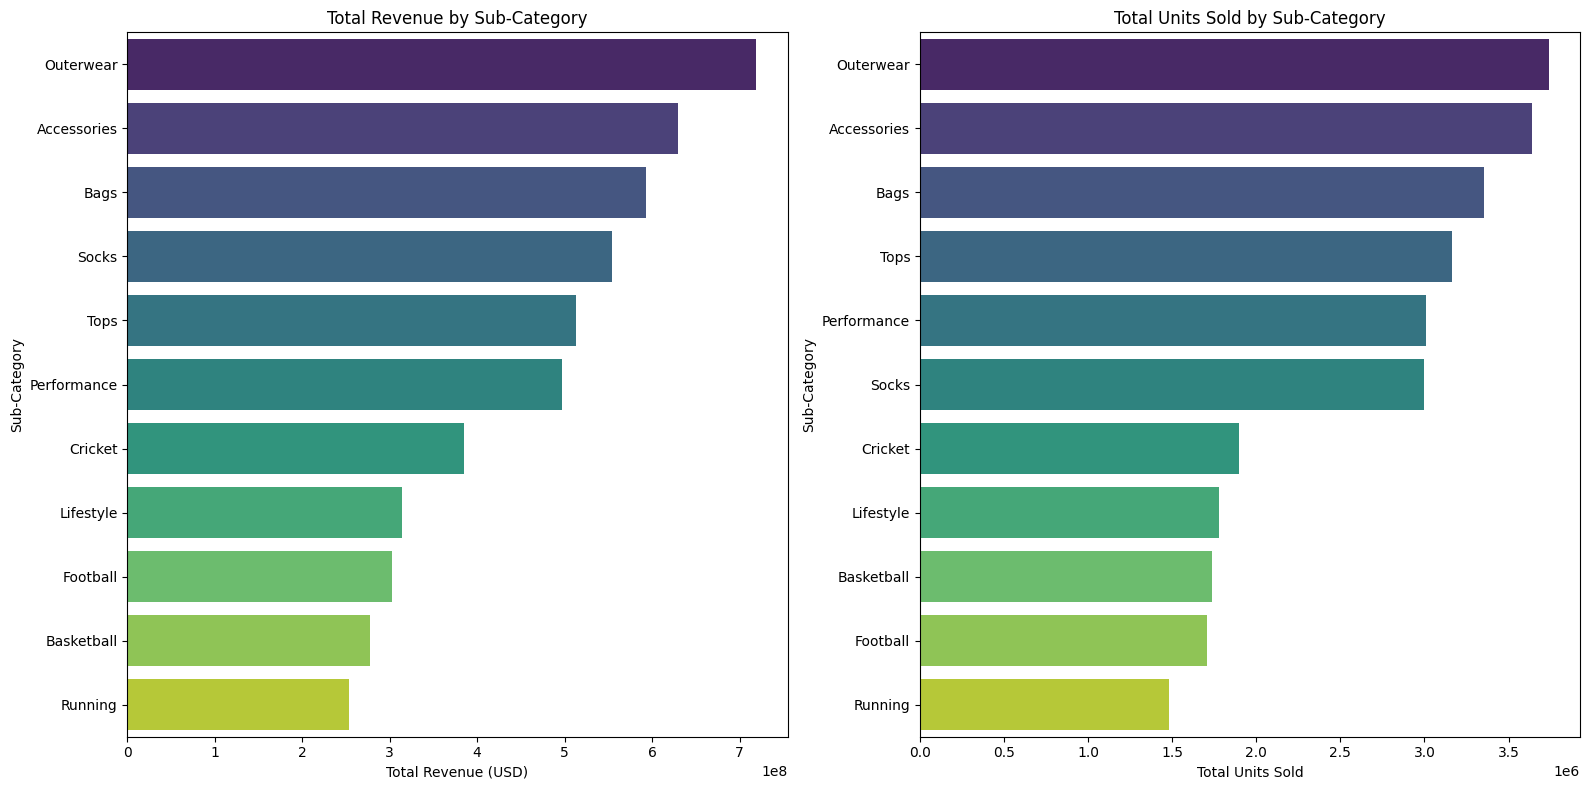

In [ ]:
subcategory_revenue = nike_sales_data.groupby('Sub_Category')['Revenue_USD'].sum().reset_index().sort_values(by='Revenue_USD', ascending=False)
subcategory_units_sold = nike_sales_data.groupby('Sub_Category')['Units_Sold'].sum().reset_index().sort_values(by='Units_Sold', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(y='Sub_Category', x='Revenue_USD', data=subcategory_revenue, palette='viridis', ax=axes[0])
axes[0].set_title("Total Revenue by Sub-Category")
axes[0].set_xlabel("Total Revenue (USD)")
axes[0].set_ylabel("Sub-Category")

sns.barplot(y='Sub_Category', x='Units_Sold', data=subcategory_units_sold, palette='viridis', ax=axes[1])
axes[1].set_title("Total Units Sold by Sub-Category")
axes[1].set_xlabel("Total Units Sold")
axes[1].set_ylabel("Sub-Category")

plt.tight_layout()
plt.show()


**Доходи (Revenue_USD by Sub-Category)**

* Outerwear (верхній одяг) – лідер за доходом, що може вказувати на високу середню ціну товарів у цій категорії.
* Accessories, Bags та Socks також мають високий дохід, що свідчить про їхню популярність.
* Running, Basketball та Football мають відносно менший дохід, що може бути наслідком або низької середньої ціни, або нижчого попиту.

**Кількість проданих одиниць (Units_Sold by Sub-Category)**

* Outerwear, Accessories та Bags також лідирують за кількістю проданих одиниць, що підтверджує їхній попит і популярність.
* Tops та Performance мають більше проданих одиниць, ніж Socks, що відрізняється від тренду доходу (можливо, Socks мають вищу середню ціну на одиницю).
* Running, Basketball та Football мають найнижчі показники за продажами, що узгоджується з їхнім низьким рівнем доходу.

### Average Price per Unit by Sub-Category

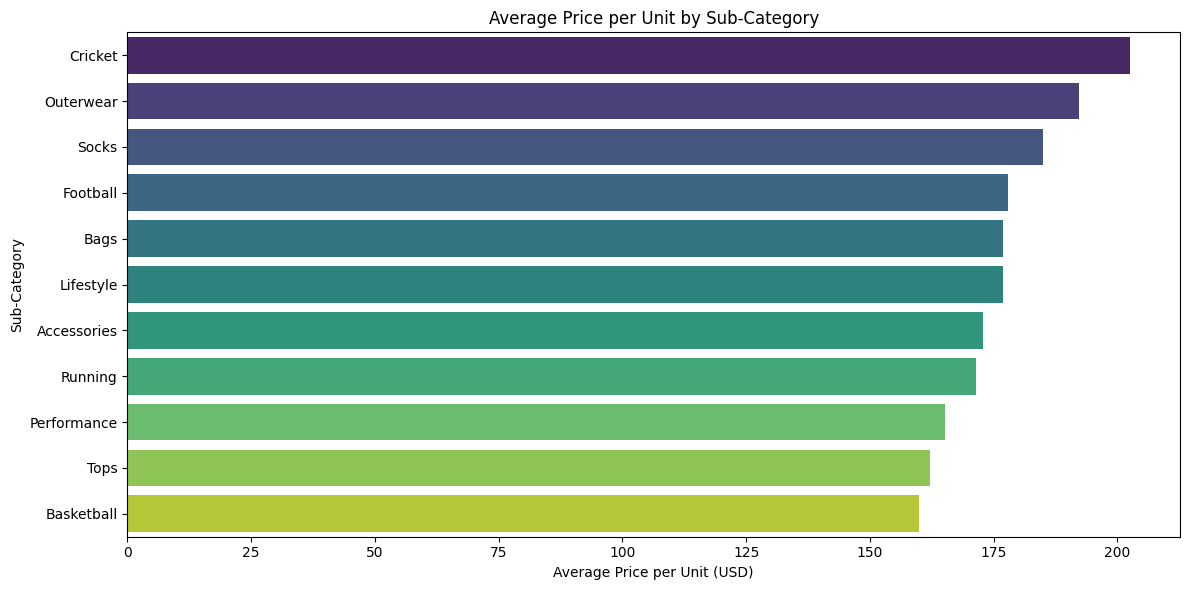

In [ ]:
subcategory_avg_price = nike_sales_data.groupby('Sub_Category').apply(lambda x: (x['Revenue_USD'].sum() / x['Units_Sold'].sum())).reset_index(name='Avg_Price_Per_Unit')

subcategory_avg_price = subcategory_avg_price.sort_values(by='Avg_Price_Per_Unit', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y='Sub_Category', x='Avg_Price_Per_Unit', data=subcategory_avg_price, palette='viridis')
plt.title("Average Price per Unit by Sub-Category")
plt.xlabel("Average Price per Unit (USD)")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()

* Cricket має найвищу середню ціну на одиницю товару, що може пояснюватися високою вартістю спортивного спорядження для цього виду спорту, але не є лідером за доходом чи продажами. Можливо, ця категорія є нішевою, з високою ціною, але обмеженим попитом.
* Outerwear (верхній одяг) також має високу середню ціну, що підтверджує його лідерство у доході на попередніх графіках. Це означає, що товари цієї категорії продаються за високими цінами.
* Socks мають одну з найвищих середніх цін, хоча їх кількість проданих одиниць не є найвищою. Це пояснює чому вони приносять значний дохід, незважаючи на нижчі обсяги продажів.
*  Running, Basketball та Performance – категорії з низькою середньою ціною та низьким доходом.

### Average Online vs Offline Sales Distribution

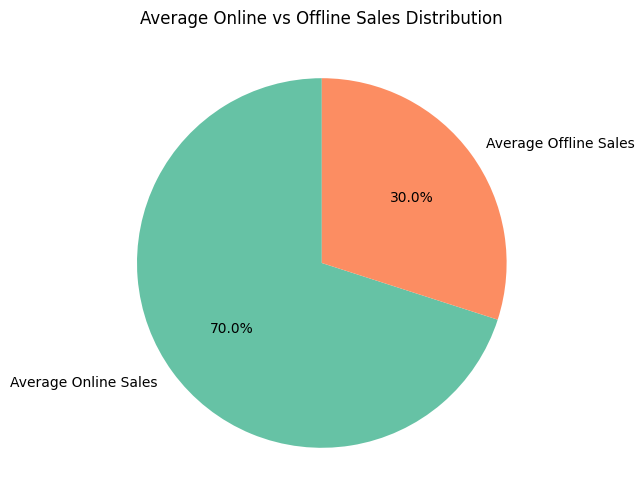

In [ ]:
avg_online_sales = nike_sales_data['Online_Sales_Percentage'].mean()
avg_offline_sales = 100 - avg_online_sales  # Все, що не онлайн, вважається офлайн-продажами

sales_distribution = [avg_online_sales, avg_offline_sales]
labels = ['Average Online Sales', 'Average Offline Sales']
colors = ['#66c2a5', '#fc8d62']

plt.figure(figsize=(8, 6))
plt.pie(sales_distribution, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Average Online vs Offline Sales Distribution")
plt.show()

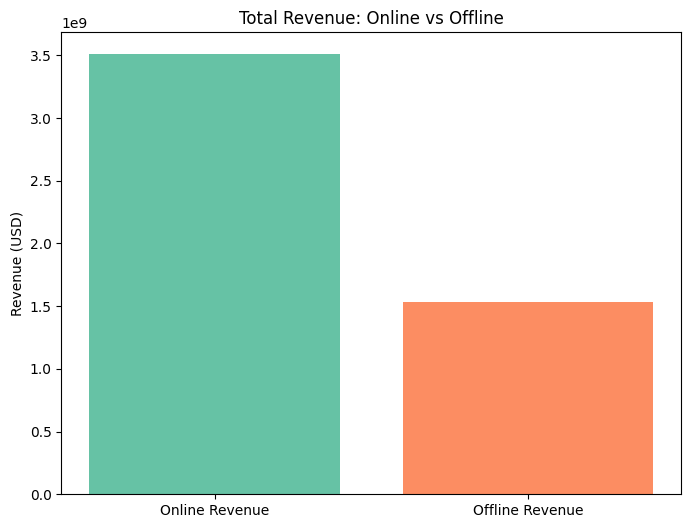

In [ ]:
online_revenue = (nike_sales_data['Revenue_USD'] * nike_sales_data['Online_Sales_Percentage'] / 100).sum()
offline_revenue = (nike_sales_data['Revenue_USD'] * (100 - nike_sales_data['Online_Sales_Percentage']) / 100).sum()

revenues = [online_revenue, offline_revenue]
labels = ['Online Revenue', 'Offline Revenue']
colors = ['#66c2a5', '#fc8d62']

plt.figure(figsize=(8, 6))
plt.bar(labels, revenues, color=colors)
plt.title("Total Revenue: Online vs Offline")
plt.ylabel("Revenue (USD)")
plt.show()

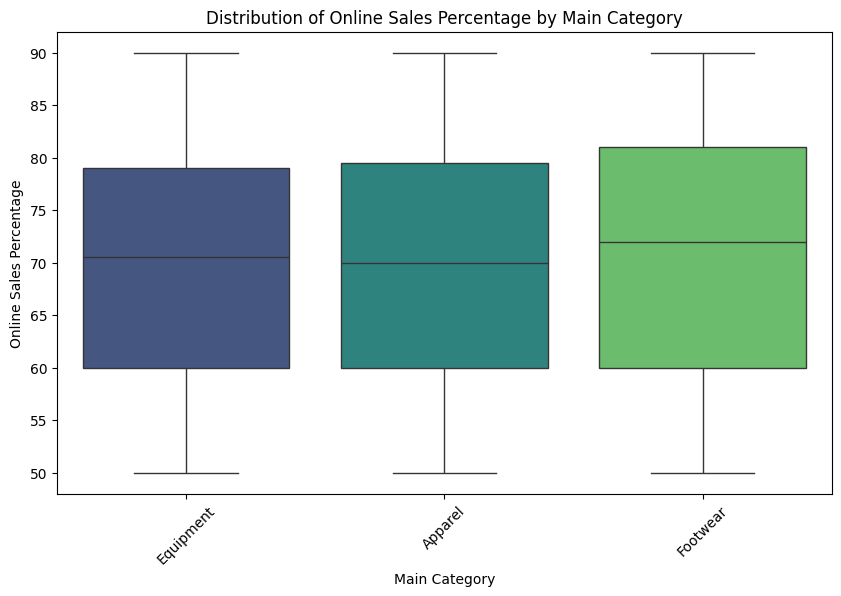

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Main_Category', y='Online_Sales_Percentage', data=nike_sales_data, palette='viridis')
plt.title("Distribution of Online Sales Percentage by Main Category")
plt.xlabel("Main Category")
plt.ylabel("Online Sales Percentage")
plt.xticks(rotation=45)
plt.show()

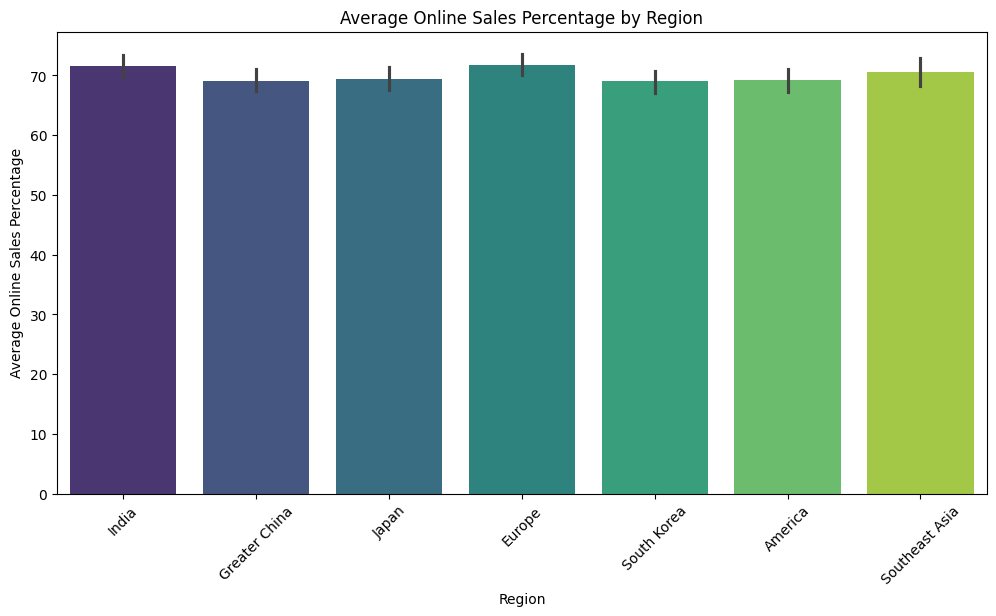

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Online_Sales_Percentage', data=nike_sales_data, estimator=np.mean, palette='viridis')
plt.title("Average Online Sales Percentage by Region")
plt.xlabel("Region")
plt.ylabel("Average Online Sales Percentage %")
plt.xticks(rotation=45)
plt.show()

* Онлайн-продажі — ключовий канал збуту, як за кількістю, так і за доходом.
* У всіх категоріях середній рівень онлайн-продажів стабільний (~70%).
* Всі регіони мають високий рівень онлайн-продажів (близько 70%).
Europe та India лідирують, що вказує на активний розвиток e-commerce у цих регіонах.

### Revenue/Units Sold by Product Line

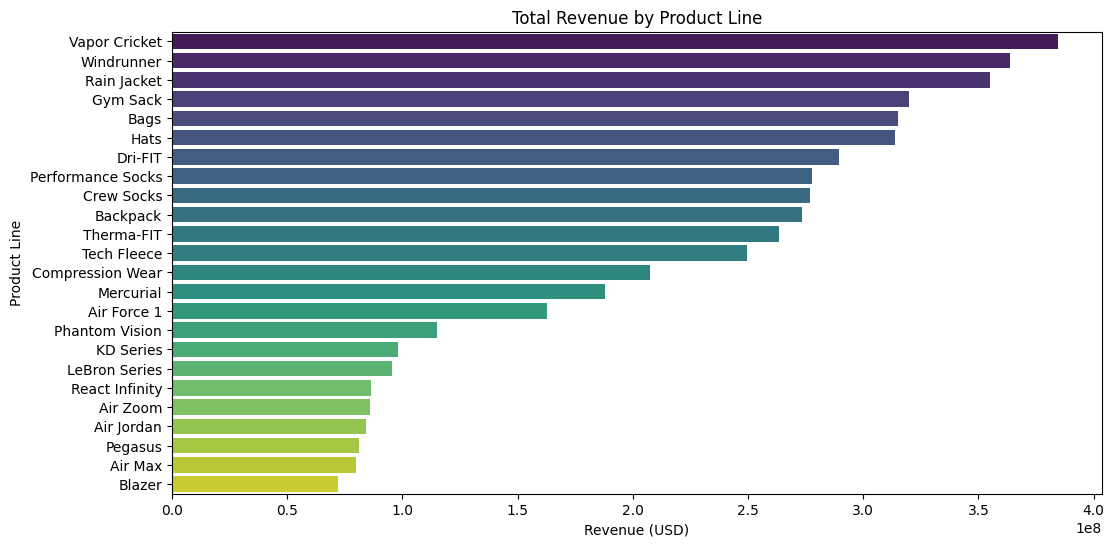

In [ ]:
product_revenue = nike_sales_data.groupby('Product_Line')['Revenue_USD'].sum().reset_index()
product_revenue = product_revenue.sort_values(by='Revenue_USD', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y='Product_Line', x='Revenue_USD', data=product_revenue, palette='viridis')
plt.title("Total Revenue by Product Line")
plt.xlabel("Revenue (USD)")
plt.ylabel("Product Line")
plt.show()


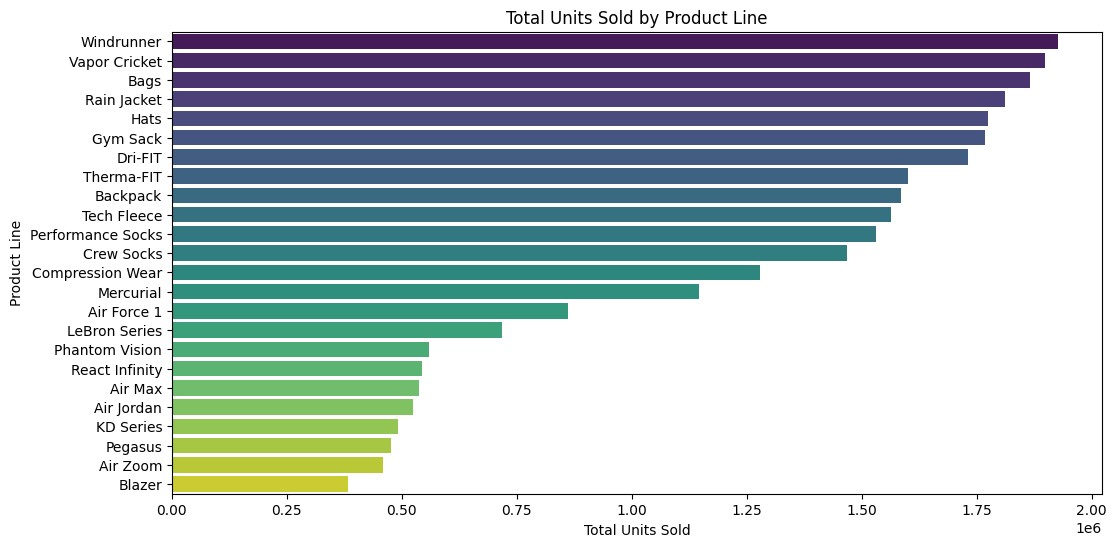

In [ ]:
product_units_sold = nike_sales_data.groupby('Product_Line')['Units_Sold'].sum().reset_index()

product_units_sold = product_units_sold.sort_values(by='Units_Sold', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(y='Product_Line', x='Units_Sold', data=product_units_sold, palette='viridis')
plt.title("Total Units Sold by Product Line")
plt.xlabel("Total Units Sold")
plt.ylabel("Product Line")
plt.show()

* Деякі лінійки приносять високий дохід, але не мають найбільшої кількості продажів, що може свідчити про високу середню ціну (наприклад, Vapor Cricket).
* Лінійки Windrunner, Bags, Rain Jacket мають високі продажі, що свідчить про популярність, але їх дохід не завжди є найвищим.
* Air Max, Blazer, Pegasus мають низькі показники за доходом та кількістю продажів, що може вказувати на обмежений попит або низьку ціну.

### Revenue by Region and Price Tier

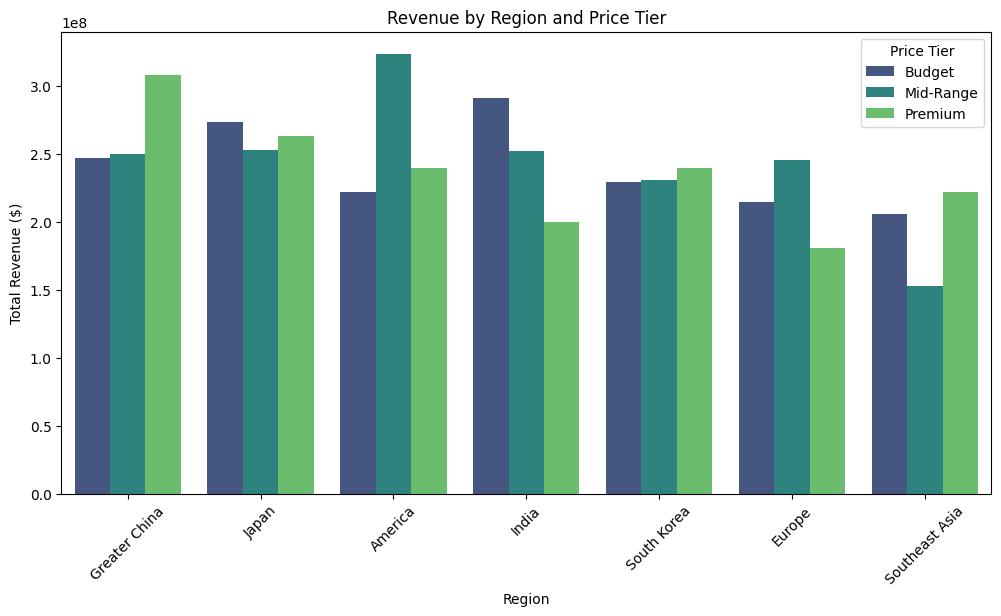

In [ ]:
region_revenue_USD = nike_sales_data.groupby(['Region', 'Price_Tier'])['Revenue_USD'].sum().reset_index()

total_revenue_per_region = region_revenue_USD.groupby('Region')['Revenue_USD'].sum()

sorted_regions = total_revenue_per_region.sort_values(ascending=False).index

region_revenue_USD['Region'] = pd.Categorical(region_revenue_USD['Region'], categories=sorted_regions, ordered=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Revenue_USD', hue='Price_Tier', data=region_revenue_USD, palette='viridis')

plt.title("Revenue by Region and Price Tier")
plt.xlabel("Region")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.legend(title="Price Tier")
plt.show()

* Greater China має найвищий загальний дохід, з домінуванням Premium сегменту, що свідчить про сильний попит на преміальні товари.
* Japan та America займають друге і третє місце за доходом, причому в Японії доходи рівномірно розподілені між усіма сегментами, а в Америці найбільше доходу приносить Mid-Range сегмент.
* India та South Korea мають схожий рівень доходу, проте в Індії домінує Budget сегмент, тоді як у Південній Кореї розподіл приблизно рівномірний.
* У Europe, Mid-Range сегмент приносить найбільший дохід.
* Southeast Asia має найнижчий загальний дохід, але при цьому Premium сегмент все ж приносить значну частку доходу.



---
## Загальний висновок аналізу продажів Nike у 2024 році
**1️⃣ Загальні тенденції продажів**  
- **Грудень є піковим місяцем за доходами та обсягами продажів**, що пояснюється святковим сезоном та підвищеним попитом на одяг, взуття та аксесуари.  
- **Лютий також демонструє високі доходи та обсяги продажів**, ймовірно, через післясвяткові розпродажі та зимові колекції.  
- **Березень, квітень та серпень характеризуються зниженими показниками продажів**, що може бути пов’язано з перехідними сезонами.  

**2️⃣ Вплив регіонів на дохід та продажі**  
- **Greater China, Japan та America — лідери за доходом та кількістю проданих одиниць**, що свідчить про їх важливість у загальній структурі продажів Nike.  
- **Southeast Asia має найнижчий рівень доходу**.
- **India та South Korea демонструють середній рівень доходу, проте в Індії переважають бюджетні товари, тоді як у Південній Кореї спостерігається рівномірний розподіл цінових категорій**.  

**3️⃣ Аналіз ключових категорій продуктів**  
- **Apparel (одяг) є основним драйвером доходу в більшості регіонів**, особливо в Great China, America та Japan.  
- **Equipment (спортивне спорядження) займає суттєву частку ринку**, особливо в India та South Korea, що свідчить про високий попит на спортивні аксесуари.  
- **Footwear (взуття) стабільно приносить дохід, проте не є домінуючою категорією за обсягами продажів**.  

**4️⃣ Вплив підкатегорій на дохід та продажі**  
- **Outerwear (верхній одяг) приносить найбільший дохід серед підкатегорій**, що свідчить про високу середню ціну.  
- **Accessories, Bags та Socks також генерують значний дохід**, що пояснюється їхньою популярністю та високими цінами.  
- **Running, Basketball та Football мають нижчий рівень доходу та продажів**, що може свідчити про обмежений попит або нижчі ціни.  
- **Cricket має найвищу середню ціну на одиницю товару**, проте не є лідером за доходом чи продажами, що може свідчити про нішевий характер цієї категорії.  

**5️⃣ Аналіз онлайн-продажів**  
- **Онлайн-продажі є основним каналом збуту, становлячи в середньому 70% всіх продажів**.  
- **У всіх регіонах рівень онлайн-продажів стабільно високий**, проте **Europe та India мають найбільшу частку онлайн-продажів**, що свідчить про активний розвиток e-commerce у цих регіонах.  

**6️⃣ Вплив лінійок продуктів**  
- **Vapor Cricket приносить високий дохід, але не є лідером за продажами**, що свідчить про високу середню ціну.  
- **Windrunner, Bags, Rain Jacket мають великі обсяги продажів, але їх дохід не є найвищим**, що може вказувати на нижчі середні ціни.  
- **Air Max, Blazer та Pegasus мають відносно низькі показники за доходом та продажами**, що може свідчити про обмежений попит або специфічність ринку.  

**7️⃣ Вплив цінових категорій у різних регіонах**  
- **Greater China має найвищий загальний дохід, з домінуванням Premium сегменту**, що свідчить про сильний попит на преміальні товари.  
- **Japan демонструє рівномірний розподіл доходів між усіма ціновими категоріями**, що може вказувати на широку аудиторію споживачів.  
- **America має найбільший дохід від Mid-Range сегменту**, що свідчить про переважний попит на середній ціновий сегмент.  
- **India орієнтована на Budget сегмент, що робить його основним джерелом доходу в цьому регіоні**.  
- **Southeast Asia має найнижчий дохід, проте Premium сегмент все ж займає значну частку продажів**, що може свідчити про наявність вузької, але платоспроможної аудиторії.  

**Ключові інсайти з аналізу продажів Nike у 2024 році**  
✅ **Грудень є піковим місяцем за доходами та обсягами продажів через святковий сезон**.  
✅ **Greater China, Japan та America — головні ринки Nike за рівнем доходу та продажів**.  
✅ **Apparel (одяг) та Equipment (спортивне спорядження) є ключовими категоріями, що формують дохід Nike**.  
✅ **Outerwear, Accessories та Bags є найбільш прибутковими підкатегоріями**.  
✅ **Онлайн-продажі складають близько 70% всіх продажів, що вказує на домінування e-commerce каналу**.  
✅ **Регіони суттєво відрізняються за домінуючими ціновими сегментами**: Greater China орієнтована на Premium, America на Mid-Range, а India на Budget.